In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [4]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_3')>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

In [6]:
layers.Dense(10)

In [7]:
layers.Dense(10, name='layer1')

In [8]:
layers.Dense(10, activation='softmax')

In [9]:
layers.Dense(10, activation='relu', name='Dense Layer')

In [10]:
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.9033209  0.97273433]
 [0.55051935 0.95117235]
 [0.1902349  0.71401787]
 [0.18301046 0.0493412 ]
 [0.87468433 0.92735887]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.22650069,  0.18180853,  0.5770915 ,  0.3863278 ,  0.3718254 ,
         0.37116188,  0.05957556, -0.692119  ,  0.6844093 , -0.5775828 ],
       [ 0.25241745, -0.32856923, -0.4756098 , -0.16912836,  0.28587466,
        -0.63886106, -0.5244715 , -0.4106086 , -0.00190705,  0.08793736]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.04093231 0.         0.05865683 0.18446103 0.61395776 0.
  0.         0.         0.6163862  0.        ]
 [0.11539948 0.         0.         0.05181072 0.47661316 0.
  0.         

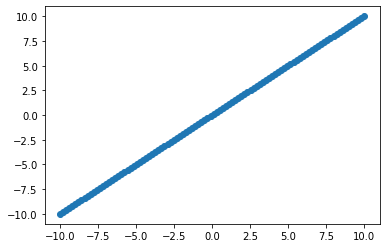

In [11]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

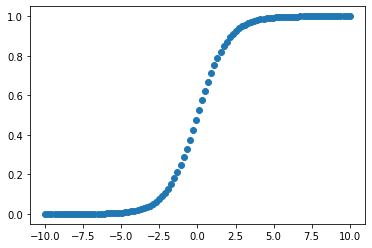

In [12]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

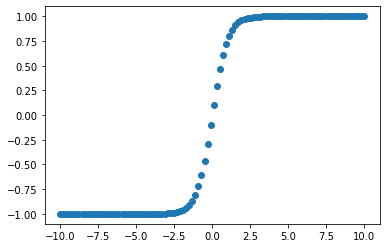

In [13]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

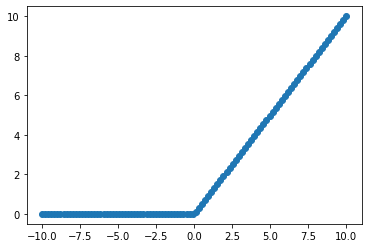

In [14]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

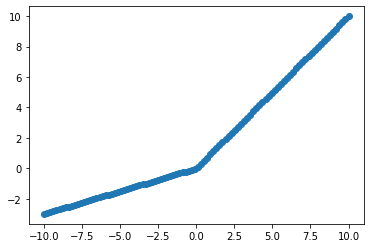

In [15]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

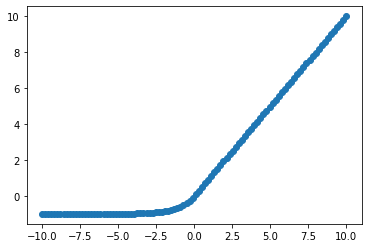

In [16]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


In [18]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


In [19]:
from tensorflow.keras import models, utils

In [20]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


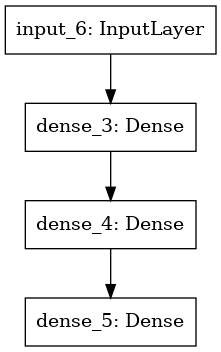

In [21]:
utils.plot_model(model)

In [22]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


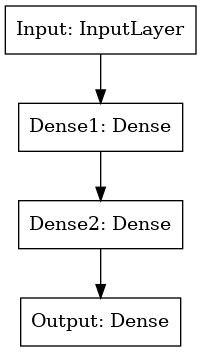

In [23]:
utils.plot_model(model)

In [24]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


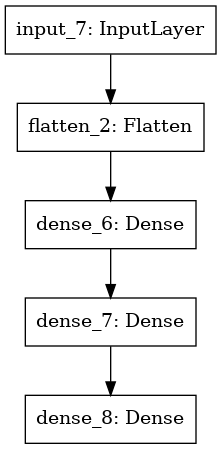

In [25]:
utils.plot_model(model)

In [26]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 28, 100)      2900        input_8[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 28, 30)       3030        dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_8[0][0]                    
                                                                 dense_10[0][0]             

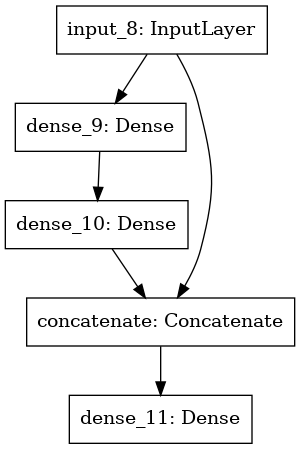

In [27]:
utils.plot_model(model)

In [28]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 100)      2900        Input_2[0][0]                    
__________________________________________________________________________________________________
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 10)       1010        dense_12[0][0]                   
____________________________________________________________________________________________

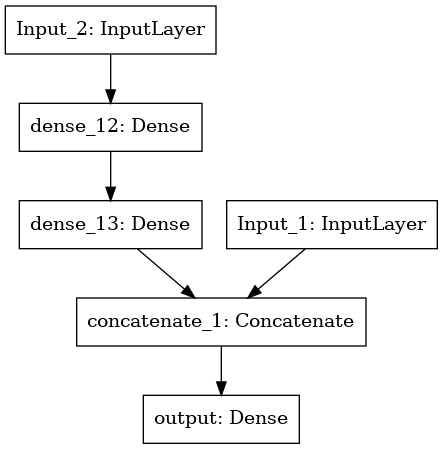

In [29]:
utils.plot_model(model)

In [30]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 10)       1010        dense_14[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_15[0][0]                   
____________________________________________________________________________________________

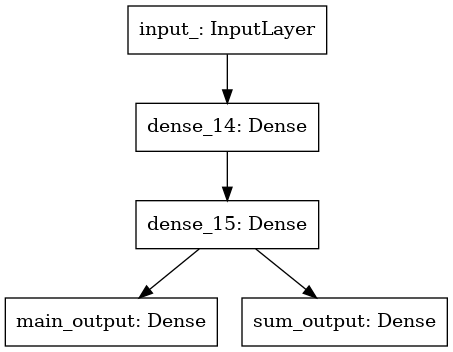

In [31]:
utils.plot_model(model)

In [32]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 10)       1010        dense_16[0][0]                   
____________________________________________________________________________________________

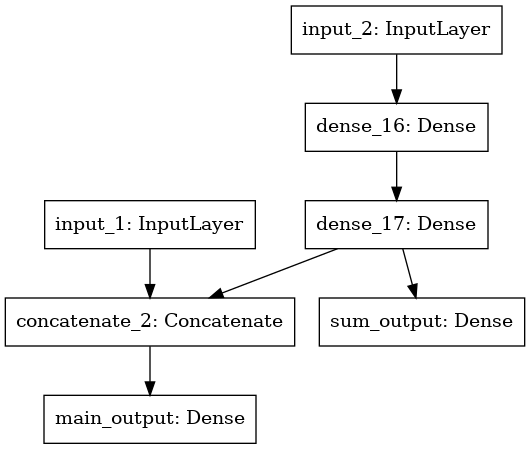

In [33]:
utils.plot_model(model)

In [34]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

In [35]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape=(100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten(input_shape=(100, 100, 3)))

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation='relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_19 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [36]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100, 100, 3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_22 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [42]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                  12000400  
_________________________________________________________________
dense_25 (Dense)             multiple                  80200     
_________________________________________________________________
dense_26 (Dense)             multiple                  20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Functional API 방식 혹은 Subclassing API 방식으로 구현해주세요.
# Functional API 방식

input_1 = keras.Input(shape=(40), name='Input_1')
input_2 = keras.Input(shape=(10), name='Input_2')

hidden = layers.Dense(100, activation='relu')(input_1)
hidden_1 = layers.Dense(100, activation='relu')(input_2)
concat = layers.Concatenate()([hidden, hidden_1])
hidden_3 = layers.Dense(40, activation='relu')(concat)
hidden_2 = layers.Dense(1, activation='relu')(concat)

hidden_4 = layers.Dense(10)(hidden_3)

model = models.Model(inputs=[input_1, input_2], outputs=[hidden_2, hidden_4])

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
Input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 100)          4100        Input_1[0][0]                    
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 100)          1100        Input_2[0][0]                    
____________________________________________________________________________________________

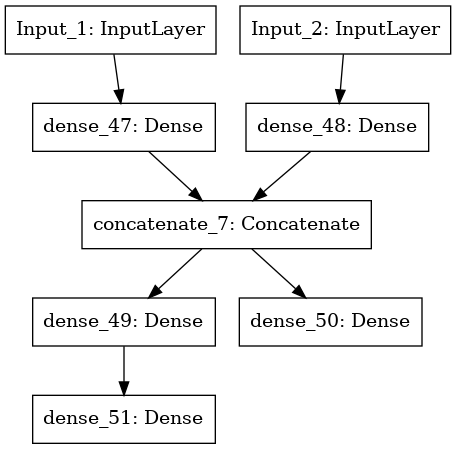

In [51]:
utils.plot_model(model)

In [70]:
# Subclassing API

class MyModel(models.Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_layer = layers.Dense(100, activation='relu')
        self.dense_layer1 = layers.Dense(100, activation='relu')
        self.concat = layers.Concatenate()
        self.dense_layer3 = layers.Dense(40, activation='relu')
        self.dense_layer2 = layers.Dense(1, activation='relu')
        self.dense_layer4 = layers.Dense(10)
        
    def call(self, input_1, input_2):
        x = self.dense_layer(input_1)
        y = self.dense_layer1(input_2)
        z = self.concat([x, y])
        x = self.dense_layer3(z)
        y = self.dense_layer2(z)
        x = self.dense_layer4(x)
        return x, y
    
data1 = tf.random.normal([40])
data2 = tf.random.normal([10])

data1 = tf.reshape(data1, (-1, 40))
data2 = tf.reshape(data2, (-1, 10))

model = MyModel()
model(data1, data2)

model.summary()

Model: "my_model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             multiple                  4100      
_________________________________________________________________
dense_93 (Dense)             multiple                  1100      
_________________________________________________________________
concatenate_19 (Concatenate) multiple                  0         
_________________________________________________________________
dense_94 (Dense)             multiple                  8040      
_________________________________________________________________
dense_95 (Dense)             multiple                  201       
_________________________________________________________________
dense_96 (Dense)             multiple                  410       
Total params: 13,851
Trainable params: 13,851
Non-trainable params: 0
___________________________________________________